<a href="https://colab.research.google.com/github/sbooeshaghi/BMGP_2020/blob/main/analysis/notebooks/barcode_validator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sbooeshaghi/BMGP_2020

Cloning into 'BMGP_2020'...
remote: Enumerating objects: 952, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 952 (delta 59), reused 5 (delta 1), pack-reused 817
Receiving objects: 100% (952/952), 474.55 MiB | 17.96 MiB/s, done.
Resolving deltas: 100% (383/383), done.
Checking out files: 100% (155/155), done.


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [3]:
fb_fn = "BMGP_2020/references/scispace/kite/feature_barcodes.txt"

In [4]:
#@title Example barcodes
# MULTISEQ
bcs = [
  "GGAGAAGA",
  "CCACAATG",
  "CCAACCGG",
  "CGAAGCCC",
  "TCAGTCGA",
  "GACCAGCC",
  "CTCAAGGT",
  "CGCCGCAA",
  "ACCAGCCG",
]

bcs_names = [
"BC1",
"BC2",
"BC13",
"BC25",
"BC37",
"BC49",
"BC50",
"BC73",
"BC74",
]


# 10xCRISPR
bcs = [
       "GGCAACGCGACCCCACGAG",
       "ATGTCACCCCCAGACCCCG",
       "TGCAGCGCCGGCGACTCAC",
       "CGGGGCACCGGTGAGTCGC",
       "CACTCGGCGGACGCAAGGG",
       "GCGCACTCGGCGGACGCAA",
       "TGCTGCTTCGGCGACCGGG",
       "TTCTCGCGGGACACCGACG",
       "AGCCCAAGCCAGAGCGGCG",
       "GAGCGGCGCGGCCTGGAAG",
       "ACCCGAGCCGCACCCGCCG",
       "GCACGGGCGGCGGAGACTC",
       "AGCAGGGCTCTCCTCCCGG",
       "TGTGGCTGAAGCAGCGAGG",
       "GGAGAGGCGCAGCATCCAC",
       "GAGGCGCAGCATCCACAGG",
       "GAGCGAGGAGGGCGCTACG",
       "GTCGCTATCGGAGGCCGCG",
       "CACCAGATACAGCGCTCTG",
       "GCGGCAGCGCGGTCAGTGG",
       "GAGCCTCAGCGAGCGGAGG",
       "CTGGAGCCTCAGCGAGCGG",
       "GACGAAGTCTATAAAGGGC",
       "CATGGCGTGAGTACCGGGG",
       "TCCTCCTCAGCAGCACCGG",
       "GTCATGGAGCGGAACGCCA",
       "ACTTTGCTGTACCCATCAG",
       "AGGCCCAGTCATCCTACAC",
       "ATGTTGGCCGCCGCTGCGA",
       "GACGGGAGGATGGAGTCGA",
       "CTTCCACCACAGGTACCTA",
       "CCTCGCCTGGCTGCTCCCT",
       "CCGGCCGGGCGGCGAGTAG",
       "TGCTGATAAGGGAAGGGAC",
       "GCTGCTGCCACAGACCGAG",
       "CCCCGGGAGCGGAGAGCGA",
       "AAACGCACAGCAACTCGCA",
       "GGCGAAATGGCTCCGACCG",
       "CACAGGAGACCATGTCCGG",
       "AGGGCAGCGAGAGGTTCGC",
       "GAGCTTTCGCAGCTGGAGA",
       "TCACTATCTCCCGGGTGAA",
       "GGCCCGCGCGGCACTTACG",
       "GCGCGGGCGGGAAGCGAAG",
       "GCGCGGGCAGCGTGAAGCG",
       "GCGCGTGCGTACGCGACGG",
       "CGGACCTCGGGATCTGGGT",
       "CCGGGCGCTGTCGGACCTC",
       "CCTTGCACCGGGCTTTGCA",
       "CGCCGGCCGCGGTTCTCCC",
       "CCGGCCCAGGATGTAGAGC",
       "CTGCGGGCGCTGGCAAATC",
       "TGGTGTCATGGCAGCTGCG",
       "ACGCTTCGGGTTGGTGTCA",
       "GAGATCCGCGGAGGCCGAC",
       "CGACGGCAGAGGGGCCTAA",
       "CCGCCATGGCCGACAAGGA",
       "GTGCAGTCCCCGGTACTGA",
       "CCCAAGCGCCTACTCGCAC",
       "CTGCGAAAGCGCCAGGGTG",
       "GATCGCCGAGCGCGAGTGA",
       "GGGAGAGCGAGCAGCGAGC",
       "CTCAGGGCAGCGAGACTAT",
       "GCCGGCCGGCCGGCACGGG",
       "TTTTGGGCCGCGGCGGGAG",
       "GTCTCACCATGGAGCGGAA",
       "AGACGGAGCTCTTGAGTAG",
       "TGAGTAGAGGGCCGAAGAG",
       "CCGGCGGGTAGCTGGCGGG",
       "AGGCTCCGGCGGACCGAGG",
       "ACTTCGGTCGCGGGCGGTG",
       "GAAACGCTGCCGCTGAGGG",
       "GTTAGAGCCCGTGCGGAGG",
       "CTGCGGCGGAGCCTCCTTA",
       "TGCGTGAGGCGAGAGGAGC",
       "ACGCACGAGTGGAAGTCCC",
       "CGACACCGCGGCTTCCGCG",
       "GCCCGTCGGCGGGTGTCGA",
       "GCCCCGCTCGGCGATACCC",
       "GTCGCGTCCGACACCCGGT",
       "TACAGCAACAAGGCTGAGA",
       "GTCTTGGCCTGTTCCTCAA",
       "CGAGCCGGGACCCTGGTAC",
       "CTGGAGCGCGGCAGGTGAG",
       "GCCGGCGAACCAGGAAATA",
       "AGCGATAGCTGAGTGGCGG",
       "GCGCAGGCAGAAGTCACCG",
       "ACTCCACCGCCCGGAGCAG",
       "ACCGACTGACGGTAGGGAC",
       "GGACGGGAGGCGAGCAAGA",
]

bcs_names = [
"APH1A-1",
"APH1A-2",
"CDKN3-1",
"CDKN3-2",
"EZR-1",
"EZR-2",
"GRB2-1",
"GRB2-2",
"GSK3A-1",
"GSK3A-2",
"HRAS-1",
"HRAS-2",
"JUN-1",
"JUN-2",
"PPIB-1",
"PPIB-2",
"SNRNP70-1",
"SNRNP70-2",
"SNRNP40-1",
"SNRNP40-2",
"PPP2CA-1",
"PPP2CA-2",
"ATF4-1",
"ATF4-2",
"BAZ1B-1",
"BAZ1B-2",
"BRD4-1",
"BRD4-2",
"CAMLG-1",
"CAMLG-2",
"CSNK2A1-1",
"CSNK2A1-2",
"CTCF-1",
"CTCF-2",
"CTNNB1-1",
"CTNNB1-2",
"DHX9-1",
"DHX9-2",
"EIF4EBP1-1",
"EIF4EBP1-2",
"ELOF1-1",
"ELOF1-2",
"H2AFY-1",
"H2AFY-2",
"KDM1A-1",
"KDM1A-2",
"LMNA-1",
"LMNA-2",
"MBNL1-1",
"MBNL1-2",
"MORF4L1-1",
"MORF4L1-2",
"NOC2L-1",
"NOC2L-2",
"PAIP2-1",
"PAIP2-2",
"RBBP4-1",
"RBBP4-2",
"RBM25-1",
"RBM25-2",
"SET-1",
"SET-2",
"SMARCD1-1",
"SMARCD1-2",
"SRPK1-1",
"SRPK1-2",
"SRRT-1",
"SRRT-2",
"SUZ12-1",
"SUZ12-2",
"TPR-1",
"TPR-2",
"TRA2B-1",
"TRA2B-2",
"UBE2N-1",
"UBE2N-2",
"UBXN1-1",
"UBXN1-2",
"EZH2-1",
"EZH2-2",
"ACE2-1",
"ACE2-2",
"TMPRSS2-1",
"TMPRSS2-2",
"RAB1A-2",
"RAB1A-3",
"DPP4-1",
"DPP4-2",
"HDAC1-1",
"HDAC1-2",
]

In [161]:
def load_bcs(bcs_fn):
  bcs = []
  bcs_names = []
  with open(fb_fn, 'r') as f:
    for l in f.readlines():
      l = l.strip()
      bc, n = l.split("\t")
      bcs.append(bc)
      bcs_names.append(n)
  return (bcs, bcs_names)

def kmerize(s, k):
  L = len(s)
  return [s[i:i+k] for i in range(L-k+1)]
kmerize("sina" ,3)

complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'} 
def rev_c(seq):
    bases = list(seq) 
    bases = reversed([complement.get(base,base) for base in bases])
    bases = ''.join(bases)
    return bases
rev_c("ATC")

def make_ec(bcs, bcs_names, k=None, rc=False):
  length = min([len(i) for i in bcs])
  if not k:
    k = length
  d = defaultdict(list)
  for bc, bc_name in zip(bcs, bcs_names):
    # forward strand
    if rc:
      bc = rev_c(bc)
      bc_name = f"{bc_name}_rc"
    kmers = kmerize(bc, k)
    for kmer in kmers:
      d[''.join(kmer)].append(bc_name)
  return d

# def check_kmers(bcs, bcs_names, k=None):
#   length = min([len(i) for i in bcs])
#   if not k:
#     k = length if length % 2 else length - 1
#     print(f"Optimal kmer length: {k}")

#   d = defaultdict(list)
#   for bc, bc_name in zip(bcs, bcs_names):
#     # forward strand
#     kmers = kmerize(bc, k)
#     for kmer in kmers:
#       d["".join(kmer)].append(bc_name)
    
#     # reverse complement strand
#     kmers = kmerize(rev_c(bc), k)
#     for kmer in kmers:
#       d["".join(kmer)].append(bc_name + "_rc")
#   return d

def ham(k1, k2):
    first  = np.array(list(k1))
    second = np.array(list(k2))
    dist = (first!=second).sum()
    return dist

def cmp_kmers(ecs, rc = False):
  kmers = list(ecs.keys())
  ecs = list(ecs.values())
  d = defaultdict()
  n = len(kmers)
  nc = n*(n-1)//2
  checkpoint = nc//10
  print(f"Making {nc:,.0f} comparisons")
  c = 0
  for i in range(n):
    for j in range(i+1, n):
      c += 1
      if c % checkpoint == 0:
        print(f"{c:,.0f}")
      k1, k2 = kmers[i], kmers[j]
      
      # if comparing kmer to revc of other kmers
      if rc:
        k2 = rev_c(k2)
      
      dist = ham(k1, k2)
      d[(kmers[i], kmers[j])] = dist
  return d

def ambig_ecs(ecs):
  ambig = []
  for i in ecs.values():
    if len(i) > 1:
      ambig.append(i)
  return ambig

def merge_ecs(ecs1, ecs2):
  m = defaultdict(set)

  uniq = set(list(ecs1.keys()) + list(ecs2.keys()))
  print(f"{len(uniq):,.0f} unique kmers")
  for k in uniq:
    m[k].update(ecs2[k])
    m[k].update(ecs1[k])
  return m

def ambig_per_len(bcs, bcs_names, bc_len=None):
  # across multiple kmer lengths
  kmer_lens = np.arange(2, bc_len + 1)
  ambig_bcs = []
  for kmer_len in kmer_lens:
    # Determine the set of ambiguous barcodes
    ambig_bc = set()
    ecs = make_ec(bcs, bcs_names, kmer_len)
    for k,i in ecs.items():
      if len(i) > 1:
        ambig_bc.update(i)
        # for j in i:
        #   ambig_bc.add(j.split("_")[0])
    ambig_bcs.append(list(ambig_bc))
  return ambig_bcs

In [8]:
bcs, bcs_names = load_bcs(fb_fn)

# Validation

## Length validation

In [152]:
bc_len = min([len(i) for i in bcs])
max_bcs = 4**bc_len
print(f"{max_bcs:,.0f}")
# how many if you impose a hamming distance constrain?

1,048,576


## Barcodes with subsequences that are ambiguous

In [153]:
ecs = make_ec(bcs, bcs_names, k=9)
ecs_rc = make_ec(bcs, bcs_names, rc=True)

In [154]:
i = 0
for k, v in ecs.items():
  if len(v) > 1:
    i += 1
    print(i, k, v)

1 AGCTTATCC ['slide_2G', 'slide_2H']
2 GCTTATCCG ['slide_2G', 'slide_2H']


In [155]:
ambig = ambig_ecs(ecs)

In [156]:
ambig

[['slide_2G', 'slide_2H'], ['slide_2G', 'slide_2H']]

## Shared subsequence

In [157]:
# m = merge_ecs(ecs, ecs_rc)
# c = cmp_kmers(m)
c = cmp_kmers(ecs)

Making 4,853,170 comparisons
485,317
970,634
1,455,951
1,941,268
2,426,585
2,911,902
3,397,219
3,882,536
4,367,853
4,853,170


In [158]:
df = pd.Series(c)

In [159]:
df.nsmallest(10)

AGCTTATCC  AGCGCATCC    2
           AGGTCATCC    2
           AGCGTAACC    2
           AGCTCCTCC    2
           AGGATATCC    2
AACCTGGTC  ATCCTGGCC    2
           AATCCGGTC    2
           AACCGGATC    2
           AGCCTGATC    2
ACCTGGTCT  ACCTGGACG    2
dtype: int64

In [160]:
[(i, ecs[i],j, ecs[j], df[i,j]) for i,j in df.nsmallest(10).index]

[('AGCTTATCC', ['slide_2G', 'slide_2H'], 'AGCGCATCC', ['RT_734'], 2),
 ('AGCTTATCC', ['slide_2G', 'slide_2H'], 'AGGTCATCC', ['RT_808'], 2),
 ('AGCTTATCC', ['slide_2G', 'slide_2H'], 'AGCGTAACC', ['RT_1307'], 2),
 ('AGCTTATCC', ['slide_2G', 'slide_2H'], 'AGCTCCTCC', ['RT_1367'], 2),
 ('AGCTTATCC', ['slide_2G', 'slide_2H'], 'AGGATATCC', ['RT_1601'], 2),
 ('AACCTGGTC', ['slide_1D'], 'ATCCTGGCC', ['sector3'], 2),
 ('AACCTGGTC', ['slide_1D'], 'AATCCGGTC', ['RT_595'], 2),
 ('AACCTGGTC', ['slide_1D'], 'AACCGGATC', ['RT_754'], 2),
 ('AACCTGGTC', ['slide_1D'], 'AGCCTGATC', ['RT_1718'], 2),
 ('ACCTGGTCT', ['slide_1D'], 'ACCTGGACG', ['RT_299'], 2)]

### Varying length of subesequnce

In [163]:
max_k = 10
ambig_bcs = ambig_per_len(bcs, bcs_names, max_k)

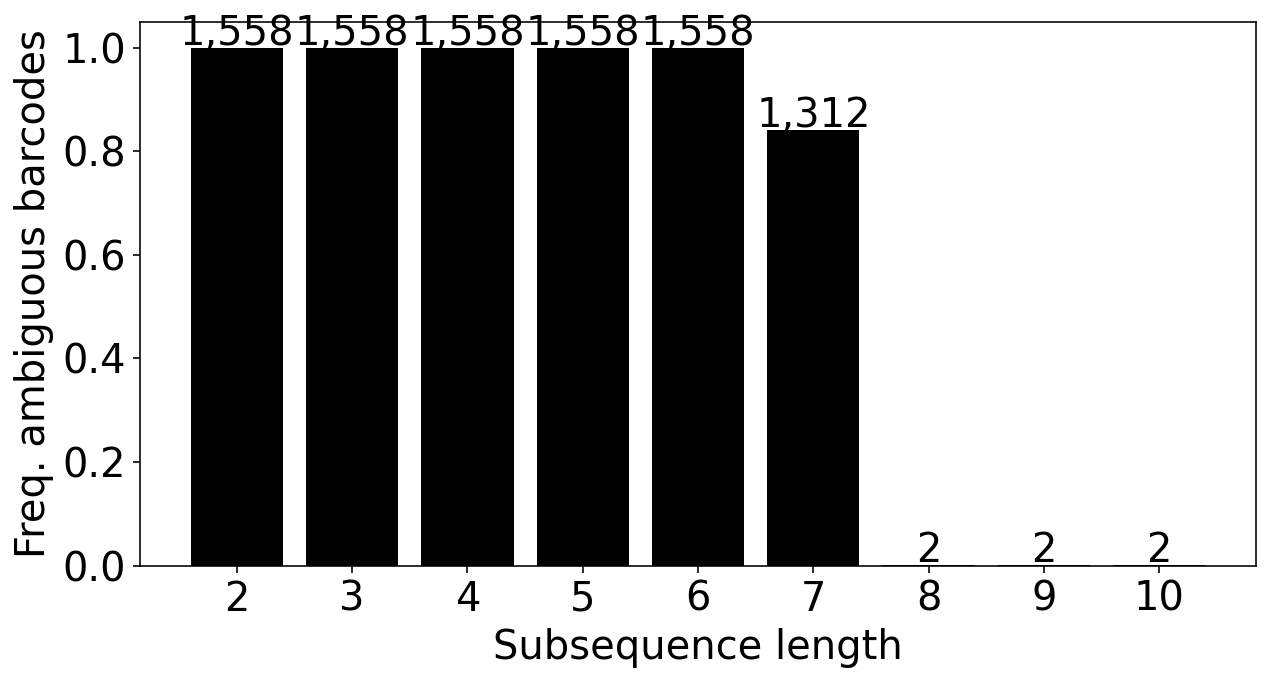

In [164]:
fig, ax = plt.subplots(figsize=(10,5))

x = np.arange(2, max_k + 1)
nbc = np.array([len(i) for i in ambig_bcs]).astype(float)
y = nbc / len(bcs)

for idx, (xx, yy) in enumerate(zip(x,y)):
  ax.text(xx,yy + 0.005, f"{nbc[idx]:,.0f}", ha="center")

ax.bar(x, y, color="k")
ax.set(**{
    "xticks": x,
    "xlabel": "Subsequence length",
    "ylabel": "Freq. ambiguous barcodes",
})
fig.savefig("shared_subseq.png", dpi=300, bbox_inches="tight")

fig.show()

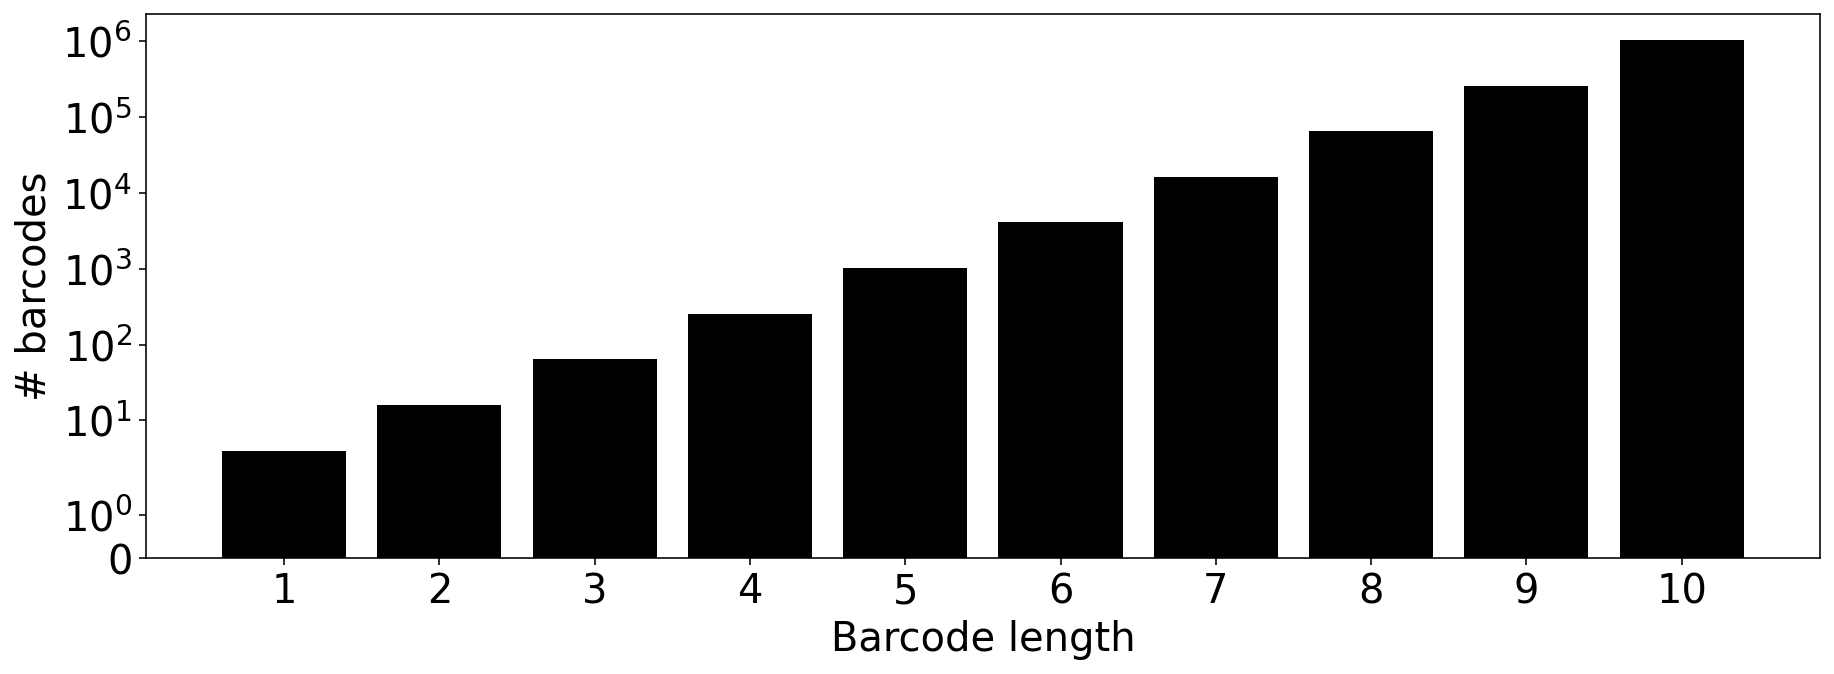

In [89]:
fig, ax = plt.subplots(figsize=(15,5))

x = np.arange (1, bc_len + 1)
y = 4**x

ax.bar(x, y, color="k")
ax.set(**{
    "yscale": "symlog",
    "xticks": x,
    "xlabel": "Barcode length",
    "ylabel": "# barcodes"
})
fig.savefig("barcode_diversity.png", dpi=300, bbox_inches="tight")
fig.show()


## Pairwise hamming / edit distance

In [168]:
mat = df.unstack().values

In [ ]:
n_bcs = len(bcs)
mat = np.zeros(( n_bcs, n_bcs ))
for i in range(len(bcs)):
  for j in range(i, len(bcs)):
    first  = np.array(list(bcs[i]))
    second = np.array(list(bcs[j]))
    mat[i,j] = (first!=second).sum()

In [169]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

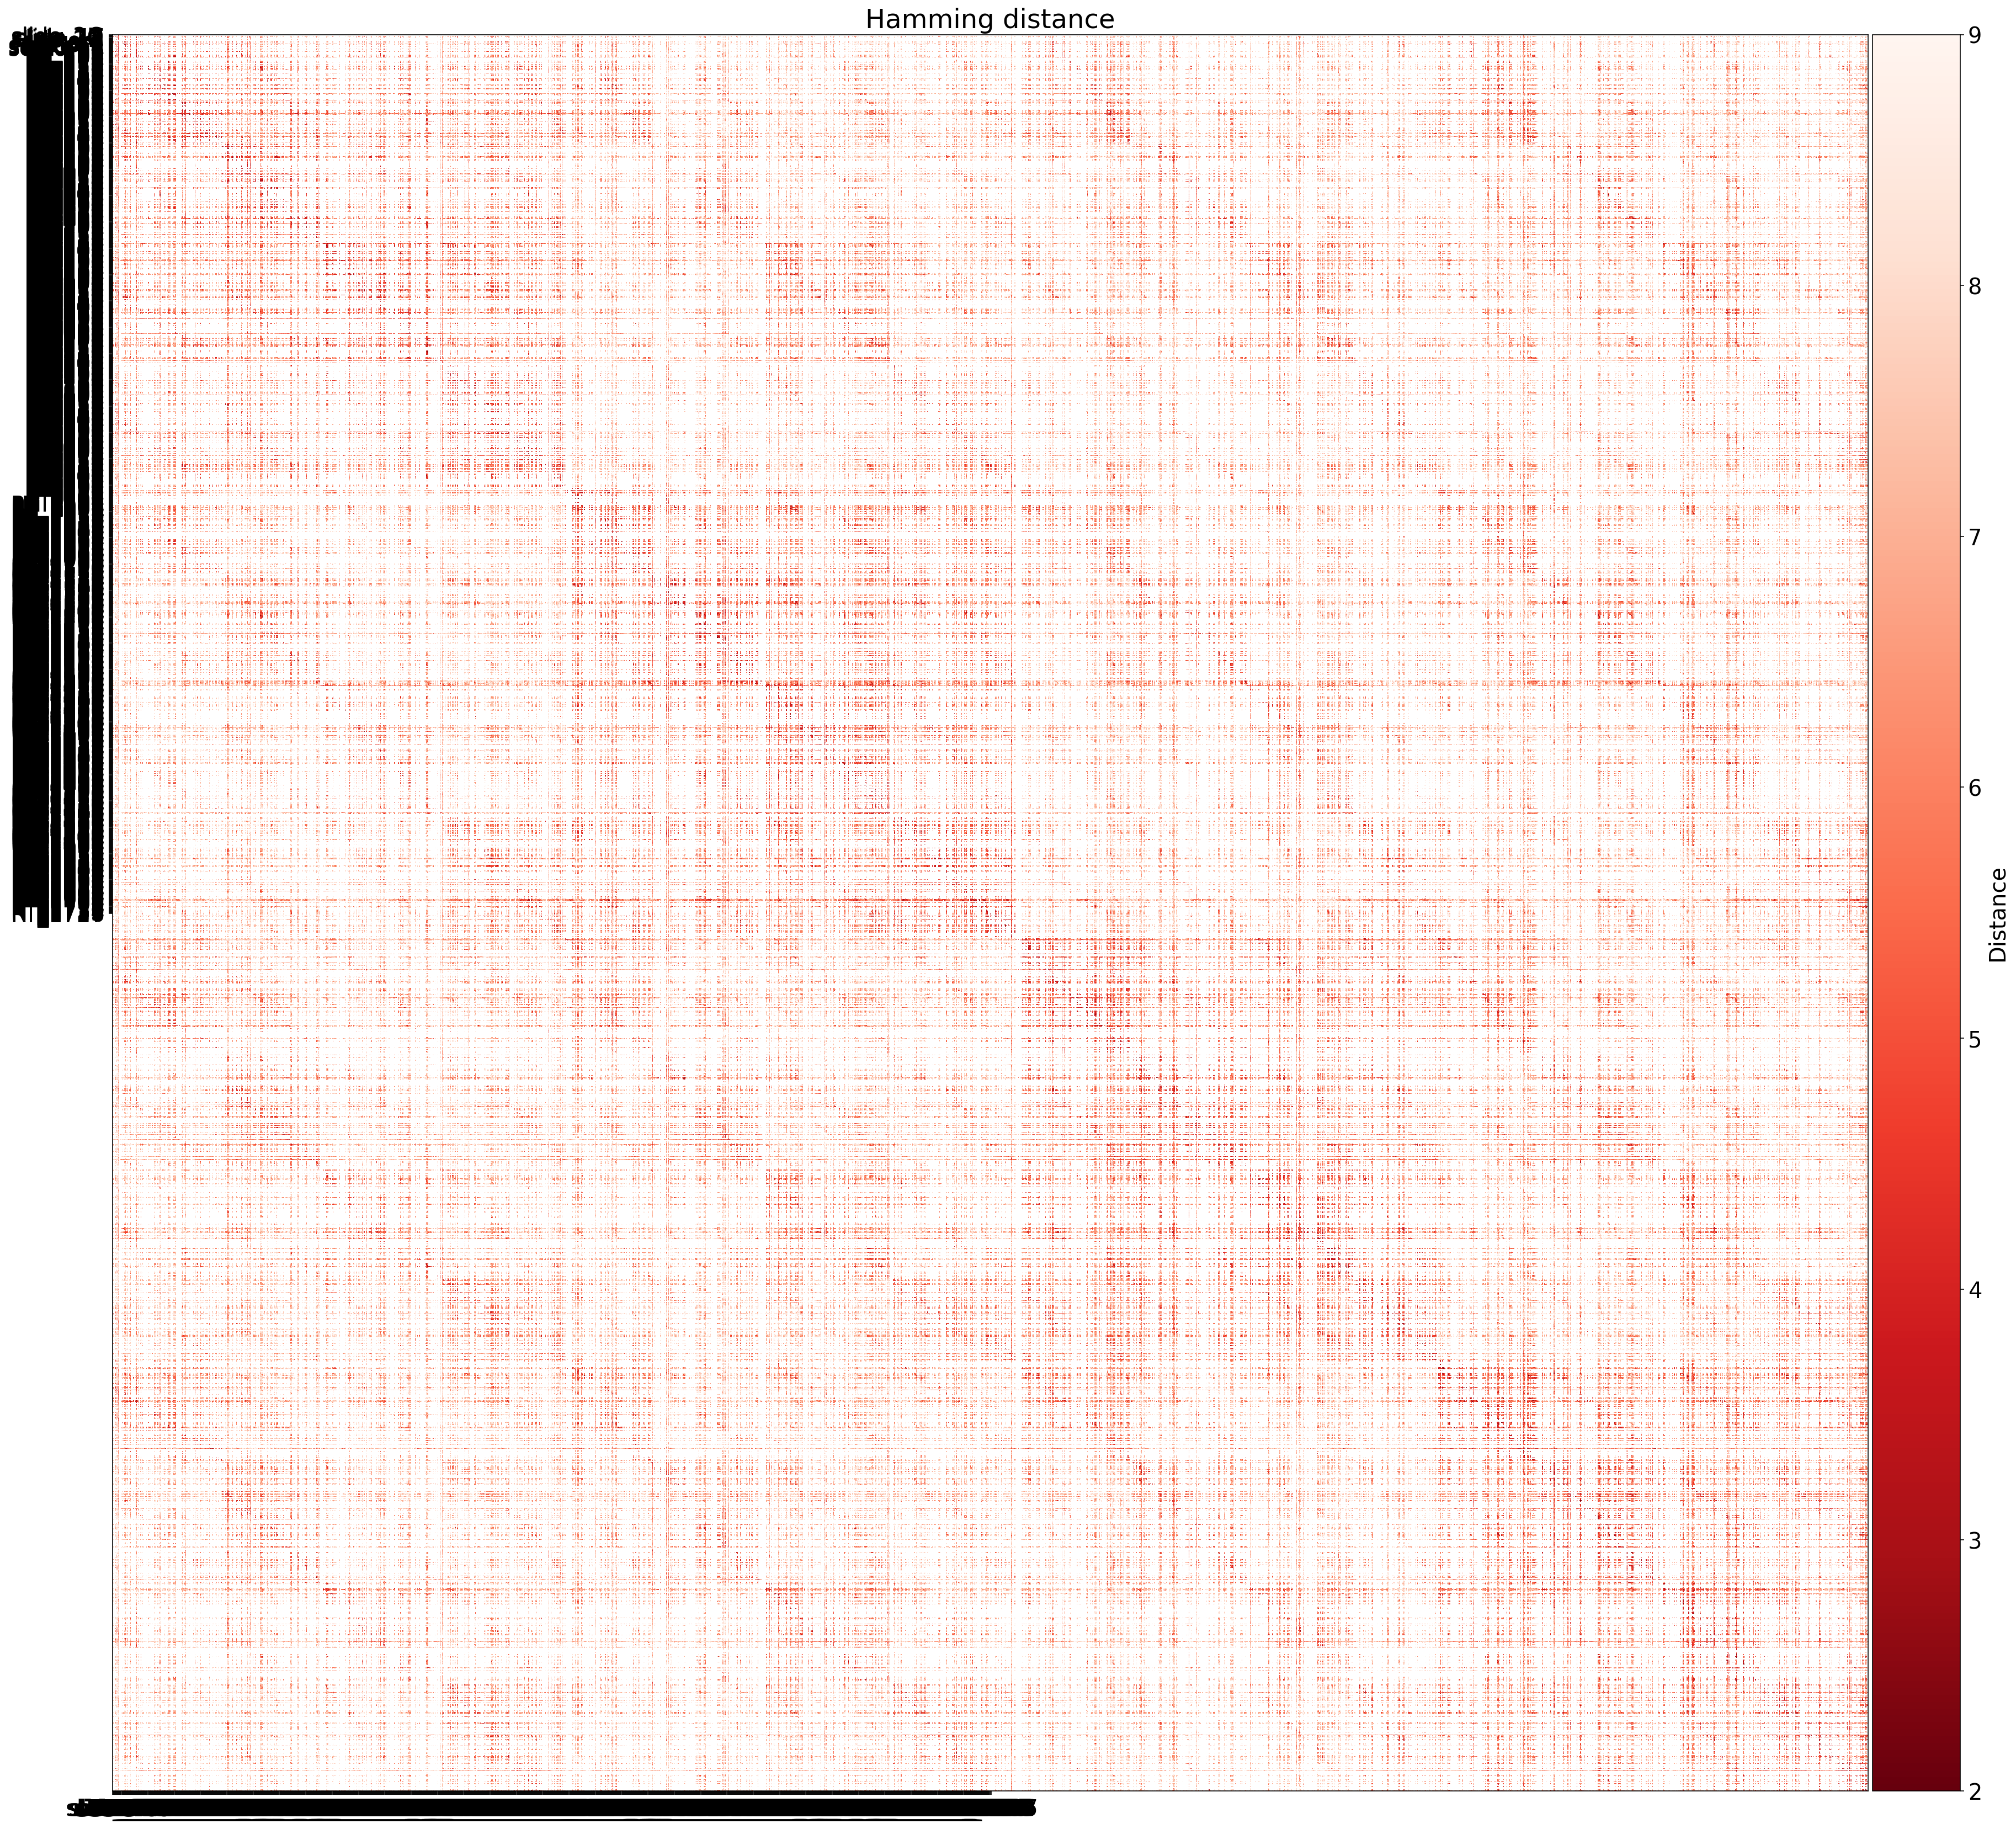

In [170]:
fig, ax = plt.subplots(figsize=(30,30))

im = ax.imshow(mat.T, cmap="Reds_r")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, label="Distance", cax=cax)

# for (j,i),label in np.ndenumerate(mat.T):
#   ham = mat[i,j]
#   if i <= j:
#     string = f"{ham:,.0f}"
#     ax.text(i,j,string,ha='center',va='center')

ax.set(**{
    "xticklabels": bcs_names,
    "yticklabels": bcs_names,
    "xticks": np.arange(len(bcs_names)),
    "yticks": np.arange(len(bcs_names)),
    "title": "Hamming distance"
})

#ax.set_xticklabels(bcs_names, rotation = 90)

# fig.savefig("pairwise.png", dpi=300, bbox_inches="tight")

fig.show()

In [171]:
mat

array([[nan, nan,  2., ..., nan, nan,  8.],
       [ 4., nan,  3., ...,  8.,  9.,  9.],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 9., nan,  7., ..., nan,  3.,  3.],
       [ 7., nan,  6., ..., nan, nan,  2.],
       [nan, nan,  7., ..., nan, nan, nan]])

In [ ]:
np.min(mat[mat>0])

3.0